In [ ]:
#Solution of Assignment-12
#Instructor: Gopal Hazra
#Computational Physics-PHY617,
#Dept of Physics, IIT Kanpur

import numpy as np
import matplotlib.pyplot as plt

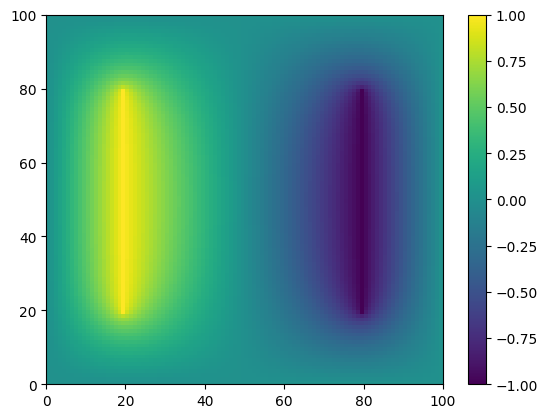

In [ ]:
#Question-1

box = np.zeros((100,100))
#Putting the Boundary
box[19:80,19] = 1
box[19:80,79] = -1
skip = [19,79]
while True:
  box_temp = np.copy(box)
  for i in range(1,99):
    for j in range(1,99):
      if 18<i<80 and j in skip:
        continue
      else:
        box[i,j]=(box[i-1,j]+box[i+1,j]+box[i,j+1]+box[i,j-1])/4

  if np.linalg.norm(box-box_temp)<1e-8:
    break

plt.pcolormesh(box)
plt.colorbar()
plt.show()

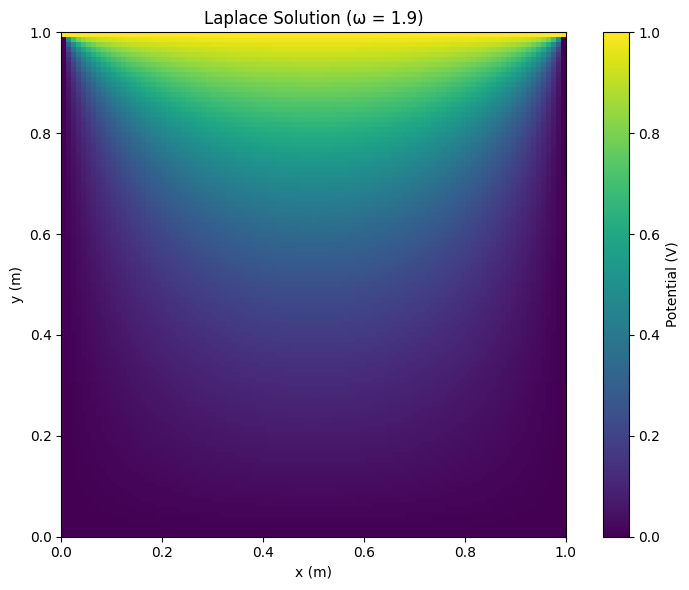

In [ ]:
#Question-2

import numpy as np
import matplotlib.pyplot as plt


N = 101
omega = 1.9
delta = 1e-6
max_iter = 10000

phi = np.zeros((N, N))
phi[-1, :] = 1.0

for it in range(max_iter):
    max_diff = 0.0
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            old = phi[i, j]
            phi[i, j] = (1 - omega) * old + (omega / 4) * (
                phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]
            )
            max_diff = max(max_diff, abs(phi[i, j] - old))
    if max_diff < delta:
        break

# Plotting the potential
plt.figure(figsize=(8, 6))
plt.imshow(phi, origin='lower', cmap='viridis', extent=[0, 1, 0, 1])
plt.colorbar(label='Potential (V)')
plt.title(f'Laplace Solution (ω = {omega})')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()
